<a href="https://colab.research.google.com/github/harshith-118/MachineLearningProjects/blob/main/Fashion_MNIST_Image_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

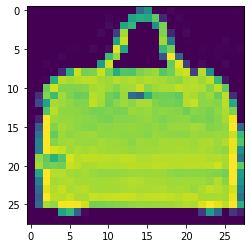

In [ ]:
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

The class labels for Fashion MNIST are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   T-shirt/top
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Trouser
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Pullover
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Dress
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Coat
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sandal
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Shirt
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sneaker
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Bag
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Ankle boot
<br>


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

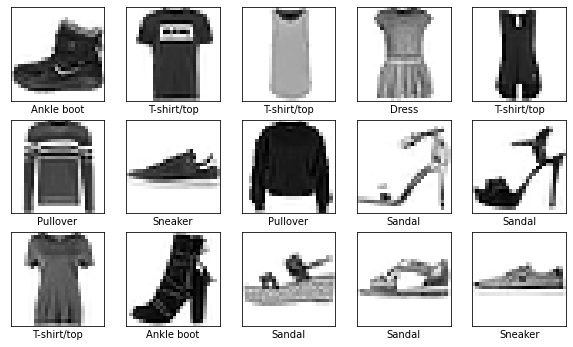

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now, since, we have one more dimension for the images i.e. Channels (color), let us add it to the dimensions of train_images and test_images by using reshape() function. In this case, it is a single color (hence, channels=1) i.e. 'grayscale'.

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

Since a convolutional layer takes a 2-D image (2-D array) as input, we needn't convert these 2-D images to a 1-D arrays

If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [ ]:
conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))
drop_1 = keras.layers.Dropout(0.5)
drop_2 = keras.layers.Dropout(0.5)
drop_3 = keras.layers.Dropout(0.5)
flat_layer = layers.Flatten()
fc = layers.Dense(128, activation='relu')
output = layers.Dense(10, 'softmax')

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters (number of layers and the number of neurons per layer). Second option to remove overfitting is to use Regularization techniques like - L1, L2, Dropout.

If the neural network has less number of layers and neurons per layer, it may not perform well even on the Training dataset i.e. may lead to Underfitting issue. And if neural network has more number of layers and neurons per layer, it may perform very well (high accuracy) on the Training dataset, but may not perform well on Test dataset i.e. may lead to Overfitting issue.

Unfortunately, there is no definite formula to determine the right architecture of your model (number of layers, number of neurons in each layer). You will have to find the right(optimum) architecture by trial and error (experimentation) method only.

Though, for neural networks, we have other regularization techniques like L1, L2 regularization, Dropout is the most effective of all and most commonly used regularization technique .

Dropout, when applied to a layer, involves of randomly "dropping out" (i.e. set to zero) a number of output features (neurons) of the layer. Let's say output of a layer before applying Dropout was [05, 0.8, 2.2, 0.9, 0.1], after applying dropout, the output will be [0, 0.8. 2.2, 0, 0.1].

The "dropout rate" is the fraction of the features(neurons) that are being zeroed-out in the layer. Generally the value of dropout rate is kept between 0.2 and 0.5.

Please note that, Dropout is applied only during the Training phase, and TensorFlow Keras API (evaluate() method) takes care of it internally, we don't need to remove the Dropout layer explicitly(manually) from the model at the time of prediction on the Test dataset.</b>

In the Test phase, Dropout is not applied, instead the layer's output values are reduced by a factor equal to the dropout rate, so as to give a feeling that during Test phase also almost same number of neurons are active there were during the Training phase.

Hence, to remove Overfitting issue in our case here, let us apply the regularization technique - Dropout.

To implement the Dropout using TensorFlow Keras, we create a Dropout layer, and place this Dropout layer immediately after the layer to which this Dropout needs to be applied to.

**NOTE**:
<br>If there is a Pooling layer after a convolutional layer, the dropout layer is applied after the pooling layer (not just after the convolutional layer, i.e. between the convolutional layer and the pooling layer)

In [ ]:
model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(max_pool_2)
model.add(drop_2)
model.add(conv3)
model.add(max_pool_3)
model.add(drop_3)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images_norm, train_labels, epochs=25, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/25
106/106 [==============================] - 186s 2s/step - loss: 0.7984 - accuracy: 0.7016 - val_loss: 0.4861 - val_accuracy: 0.8202
Epoch 2/25
106/106 [==============================] - 170s 2s/step - loss: 0.4762 - accuracy: 0.8254 - val_loss: 0.3901 - val_accuracy: 0.8602
Epoch 3/25
106/106 [==============================] - 169s 2s/step - loss: 0.4059 - accuracy: 0.8534 - val_loss: 0.3587 - val_accuracy: 0.8695
Epoch 4/25
106/106 [==============================] - 170s 2s/step - loss: 0.3582 - accuracy: 0.8721 - val_loss: 0.3077 - val_accuracy: 0.8893
Epoch 5/25
106/106 [==============================] - 168s 2s/step - loss: 0.3324 - accuracy: 0.8783 - val_loss: 0.2867 - val_accuracy: 0.8982
Epoch 6/25
106/106 [==============================] - 168s 2s/step - loss: 0.3073 - accuracy: 0.8876 - val_loss: 0.2810 - val_accuracy: 0.8988
Epoch 7/25
106/106 [==============================] - 170s 2s/step - loss: 0.2920 - accuracy: 0.8936 - val_loss: 0.2684 - val_accuracy: 0.9065

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 9s 28ms/step - loss: 0.2057 - accuracy: 0.9259


In [ ]:
print(test_accuracy)

0.9258999824523926


Now, let us make the predictions on Test dataset (say instance/image no. 88) to check the results

In [ ]:
predicted_test_labels = model.predict(test_images_norm)

In [ ]:
predicted_test_labels[88]

array([9.9937880e-01, 4.0824776e-08, 4.3331347e-05, 1.9729445e-05,
       2.8956063e-06, 5.9215027e-10, 5.5373827e-04, 7.5123280e-10,
       1.4577294e-06, 4.8626552e-09], dtype=float32)

In [ ]:
predicted_test_labels_index = np.argmax(predicted_test_labels[88])
predicted_test_labels_index

0

In [ ]:
test_labels[88]

0

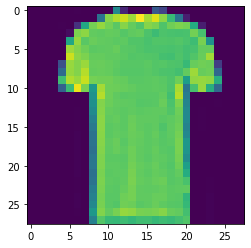

In [ ]:
plt.figure()
plt.imshow(np.squeeze(test_images[88]))